# Guided project: Finding heavy traffic indicators

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc.


## Import and view data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
traffic = pd.read_csv(r'C:\Users\skhatri\Metro_Interstate_Traffic_Volume.csv')
traffic.info()
traffic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


## Analyse traffic volume

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

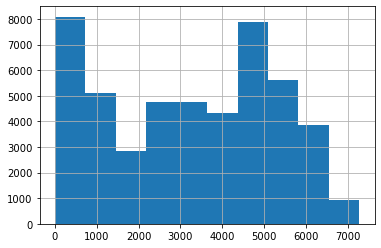

In [3]:
traffic['traffic_volume'].hist()
traffic['traffic_volume'].describe()

#### Observations:
There appear to be two peaks in the distribution, suggesting a bimodal or mixed distrubtion. One at 0 and one around 5000, with an overall median and mean of ~3300. We need to get  underneath the data more to understand what's happening.

## Day-time vs night-time traffic

Set date_time format and isolate the hour

In [4]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
traffic['hour'] = traffic['date_time'].dt.hour
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13


Create day time and night time datasets

In [5]:
day = traffic[(traffic['hour'] >= 7) & (traffic['hour'] < 19)] # day time
night = traffic[(traffic['hour'] < 7) | (traffic['hour'] >= 19)] # night time

Look at distributions of day and night traffic volume

Day traffic volume
count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Night traffic volume
count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


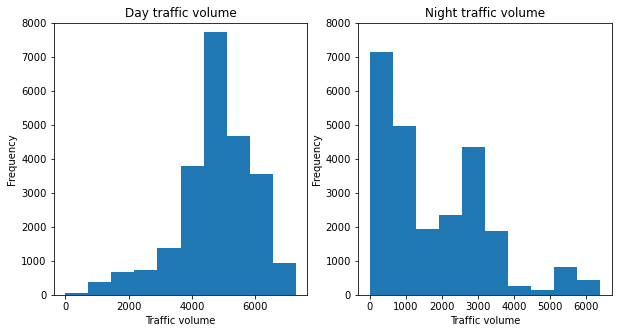

In [6]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title('Day traffic volume')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.ylim(0,8000)

plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title('Night traffic volume')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.ylim(0,8000)

print('Day traffic volume')
print(day['traffic_volume'].describe())
print('')
print('Night traffic volume')
print(night['traffic_volume'].describe())

#### Observations:
Time of day appears to be a key driver of traffic, with day time seeing significantly more heavy traffic compared to night time. 
- Day time: The distribution has left skew and single peak and median at around 5000. 75% of the time, traffic volume is above 4250.
- Night time: The distribution has a right skew and a peak around 0-500 and median around 1200. 75% of the time, traffic is below  2819.

It would make sense to focus on day time data in our investigation of heavy traffic indicators.

## Time indicators

In [7]:
day=day.copy()
day['month']=day['date_time'].dt.month
day['dayofweek']=day['date_time'].dt.dayofweek

In [8]:
day.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,month,dayofweek
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,10,1
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,10,1
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,10,1
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,10,1
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,10,1


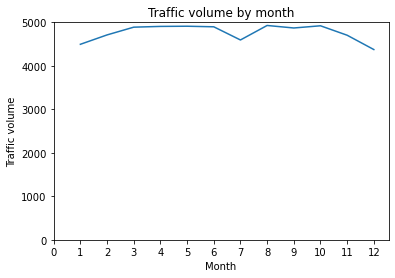

In [30]:
by_month = day['traffic_volume'].groupby(day['month']).mean(numeric_only=True)

x = np.arange(0, 13, 1)
plt.plot(by_month)
plt.title('Traffic volume by month')
plt.xlabel('Month')
plt.ylabel('Traffic volume')
plt.ylim(0,5000)
plt.xticks(x);

#### Observations:
Slight drop-offs in traffic volume in the months of November, December, Jan, Feb and July - perhaps these are linked to holiday periods. But when we normalise the y-axis, the difference between the months does not appear particularly significant.

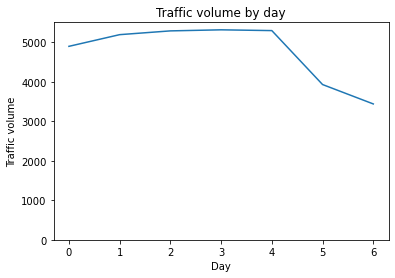

In [31]:
by_day = day['traffic_volume'].groupby(day['dayofweek']).mean(numeric_only=True)

x = np.arange(0, 7, 1)
plt.plot(by_day)
plt.title('Traffic volume by day')
plt.xlabel('Day')
plt.ylabel('Traffic volume')
plt.ylim(0,5500)
plt.xticks(x);

#### Observations:
There is a marked drop-off in traffic volumes on weekends. Therefore we should isolate business day and weekend data.

In [32]:
busday = day.loc[day['dayofweek'] < 5]
weekend = day.loc[day['dayofweek'] > 4]

by_hour_busday = busday['traffic_volume'].groupby(busday['hour']).mean(numeric_only = True)
by_hour_weekend = weekend['traffic_volume'].groupby(weekend['hour']).mean(numeric_only = True)

Text(0.5, 1.0, 'Traffic volume by hour - business days vs weekend')

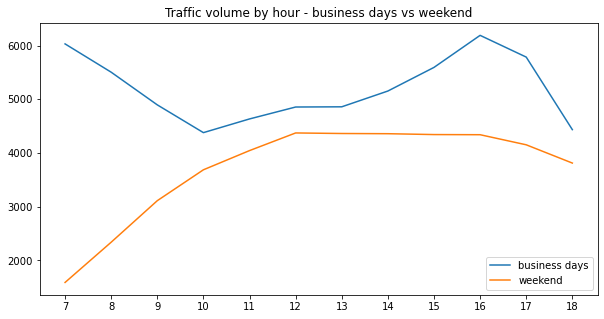

In [38]:
plt.figure(figsize = [10, 5])

x = np.arange(7,19,1)
plt.plot(by_hour_busday)
plt.plot(by_hour_weekend)
plt.xticks(x);
plt.legend(['business days','weekend'])
plt.title('Traffic volume by hour - business days vs weekend')

#### Observations:
Traffic volume is generally higher on business days at every hour, but the peaks vary. Highest traffic volumes during business days are during rush hours, 7am-9am and 3pm-5pm. The highest traffic volumes on weekends occur between 12pm-5pm, where people might be out for the day.

## Weather indicators

Look at correlation between traffic volume and numerical weather indicators.

In [34]:
traffic.corr()[['traffic_volume']]

,traffic_volume
temp,0.130299
rain_1h,0.004714
snow_1h,0.000733
clouds_all,0.067054
traffic_volume,1.000000
hour,0.352401


Out of the numerical weather indicators, temperature has the highest correlation with traffic volume, so we will investigate that further using a scatter plot.

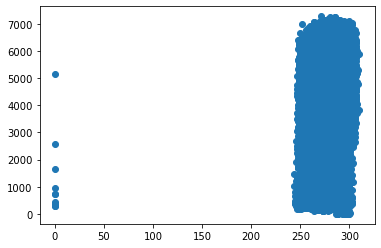

In [76]:
plt.scatter(x = traffic['temp'], y = traffic['traffic_volume']);

There are some outliers, so we will remove them and look at the pearsons correlation coefficient and scatter plot again.

In [40]:
traffic[traffic['temp']>200].corr()[['traffic_volume']]

,traffic_volume
temp,0.132291
rain_1h,0.004713
snow_1h,0.000728
clouds_all,0.066819
traffic_volume,1.000000
hour,0.352289


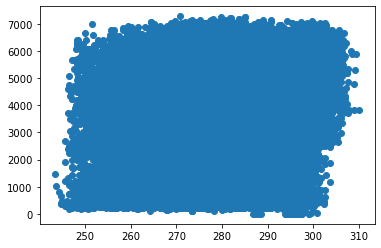

In [41]:
traffic_temp200 = traffic[traffic['temp']>200]
plt.scatter(x = traffic_temp200['temp'], y = traffic_temp200['traffic_volume'])

#### Observations:
Difficult to see any patters because the plot is extremely dense with a widespread distribution of points. This suggests temperature may not be a good indicator of traffic volumes.

## Weather types

Look at correlation between traffic volume and categorical weather indicators (`weather_main` and `weather_description`).

In [49]:
by_weather_main = traffic.groupby(traffic['weather_main']).mean(numeric_only = True)
by_weather_type = traffic.groupby(traffic['weather_description']).mean(numeric_only = True)

In [53]:
by_weather_main

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour
weather_main,,,,,,
Clear,281.489971,0.000000,0.000000,1.546710,3055.908819,11.228138
Clouds,281.466101,0.000000,0.000000,64.056120,3618.449749,12.467753
Drizzle,283.795431,0.157512,0.000000,82.319605,3290.727073,11.447007
Fog,279.415713,0.087007,0.000625,51.497807,2703.720395,7.992325
Haze,275.818581,0.046868,0.000000,58.670588,3502.101471,11.492647
Mist,279.476892,0.238336,0.000728,65.956303,2932.956639,9.495966
Rain,286.979586,2.281056,0.000187,72.599788,3317.905501,11.634520
Smoke,290.927500,0.527000,0.000000,53.350000,3237.650000,10.900000
Snow,267.955188,0.025223,0.001655,81.465229,3016.844228,11.096314


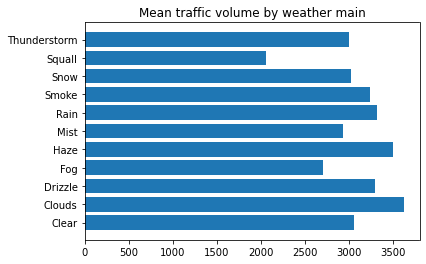

In [59]:
plt.barh(y = by_weather_main.index, width = by_weather_main['traffic_volume'])
plt.title('Mean traffic volume by weather main');

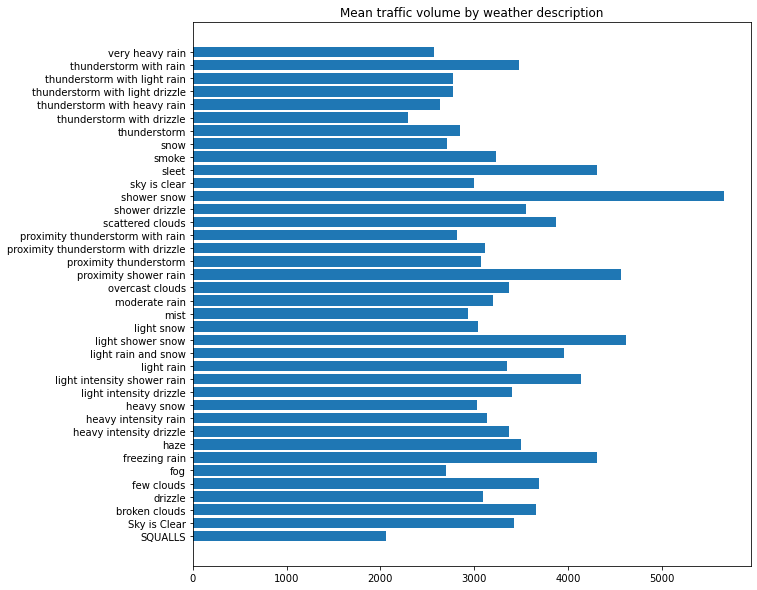

In [66]:
plt.figure(figsize = [10,10])
plt.barh(y = by_weather_type.index, width = by_weather_type['traffic_volume'])
plt.title('Mean traffic volume by weather description');

After looking at means, we should look at counts to get a picture of how frequently the said weather is occuring.

In [72]:
by_weather_main_count = traffic['traffic_volume'].groupby(traffic['weather_main']).count()
by_weather_type_count = traffic['traffic_volume'].groupby(traffic['weather_description']).count()

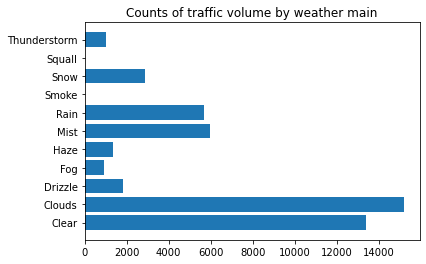

In [75]:
plt.barh(y = by_weather_main.index, width = by_weather_main_count)
plt.title('Counts of traffic volume by weather main');

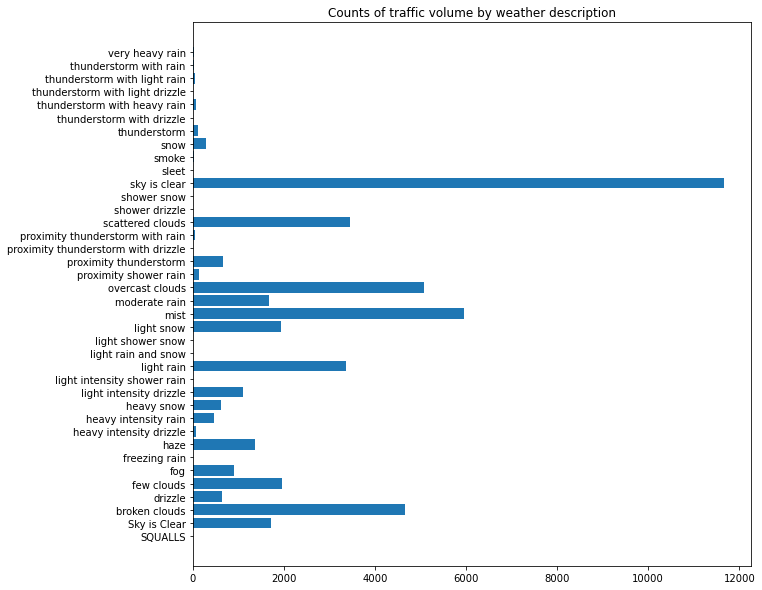

In [74]:
plt.figure(figsize = [10,10])
plt.barh(y = by_weather_type_count.index, width = by_weather_type_count)
plt.title('Counts of traffic volume by weather description');

#### Observations:
Shower snow sees the highest traffic volume (above 5000 cars), followed by light shower snow, proximity shower rain, sleet and freezing rain. Based on this alone, there does seem to a pattern here around snow and rain. However, when you look at the aggregated mean traffic volumes for snow and rain overall, they do not stand out as indicators for high traffic volume. 

This does not mean that rain and snow are not strong indicators. It could simply reflect that there are much fewer days where snow and rain occurs, and the fact that day of week and time of day, are much stronger factors as indicators of traffic volume.

A suggested next step would be to analyse the weather data after controlling for day of week and time of day.

#### Conclusions:

Based on our analysis, indicators of high traffic volume appear to be:
- Day-time (vs. night-time)
- Business days (vs. weekends), specifically rush hour between 7am-9am and 3pm-5pm
- When shower snow and rain occur (although more analysis is needed here)